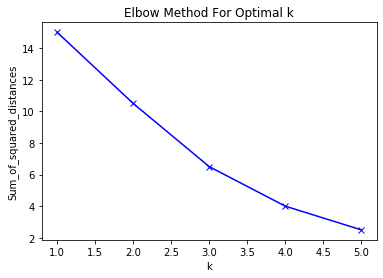

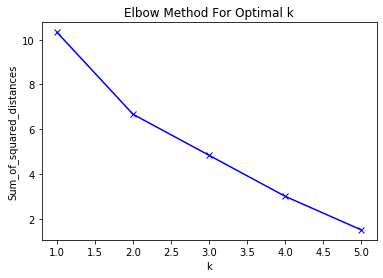

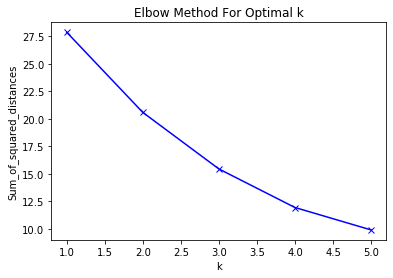

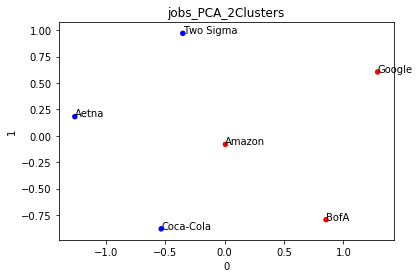

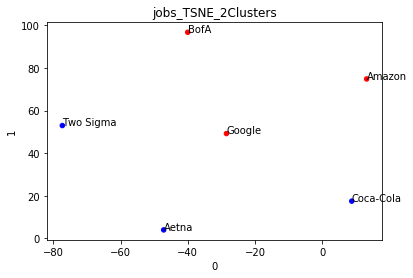

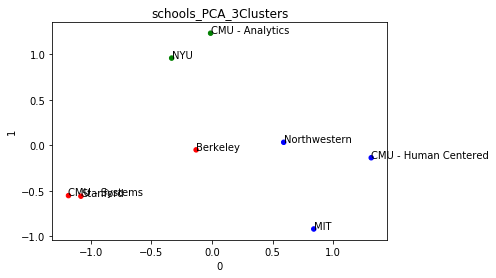

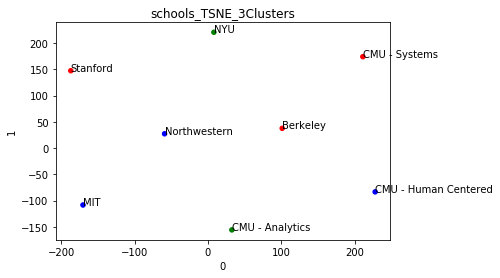

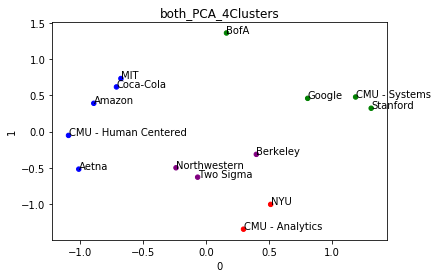

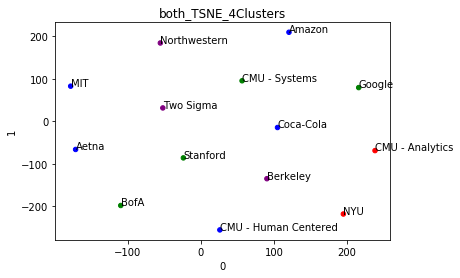

Unnamed: 0,Mentions Python/Scripting languages,Engineering as a core focus,Mentions SQL/database languages,Mentions Big data technologies,Business Communication/ interaction
Unnamed: 0,,,,,
Mentions Python/Scripting languages,1.00,0.50,0.71,-0.25,-0.32
Engineering as a core focus,0.50,1.00,0.71,-0.50,-0.63
Mentions SQL/database languages,0.71,0.71,1.00,-0.71,-0.45
Mentions Big data technologies,-0.25,-0.50,-0.71,1.00,0.32
Business Communication/ interaction,-0.32,-0.63,-0.45,0.32,1.00


In [35]:
import pandas as pd
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

os.listdir()

jobs = pd.read_excel('jobsandschools.xlsx', sheet_name=0).set_index(
    'Unnamed: 0').fillna(0).replace('X', 1).T

schools = pd.read_excel('jobsandschools.xlsx', sheet_name=1).set_index(
    'Unnamed: 0').fillna(0).replace('X', 1).T


def generate_kmeans_curve(data, name):

    Sum_of_squared_distances = []
    K = range(1,6)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(data)
        Sum_of_squared_distances.append(km.inertia_)

    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.savefig('kmeans_elbowplot_' + name + '.jpg')
    plt.show()

slikej = schools.copy()
slikej.columns = jobs.columns
both = pd.concat((jobs, slikej), axis=0)

generate_kmeans_curve(schools, 'schools')

generate_kmeans_curve(jobs, 'jobs')

generate_kmeans_curve(both, 'both')

def fit_pca(data, model):
    output = model(n_components = 2).fit_transform(data)
    #output = model.transform(data)
    return pd.DataFrame(output, index = data.index)
    

def scatter(data, name, cluster_assignments):
    ax = data.plot.scatter(0, 1, c = [{0:'red', 1:'blue', 2:'green', 3:'purple'}[c] for c in cluster_assignments])
    for i, txt in enumerate(data.index):
        ax.annotate(txt, (data.iloc[i, 0], data.iloc[i, 1]))
    plt.title(name)
    plt.savefig(name + '.png')
    plt.show()

for raw_data, source_name, n_clusters in zip([jobs, schools, both], ['jobs', 'schools', 'both'], [2, 3, 4]):
    cluster_assignments = KMeans(n_clusters=n_clusters).fit_predict(raw_data)
    for model, modelname in zip([PCA, TSNE], ['PCA', 'TSNE']):
        data = fit_pca(raw_data, model)
        scatter(data, source_name + '_' + modelname + '_' + str(max(cluster_assignments) + 1) + 'Clusters',
                cluster_assignments)
data_indexes = [0, 4, 1, 5, 7, 2, -1]
jobs = jobs.iloc[:,data_indexes]
schools = schools.iloc[:,data_indexes]

def calculate_need(jobs, schools):
    needed = pd.Series(jobs.mean(0).values - schools.mean(0).values, index = schools.columns)

    norm_need = (needed - needed.min())/(needed.max()- needed.min()) * 2 - 1

    needed = needed.to_frame()

    needed.columns = ['need']

    needed['jobs'] = jobs.mean(0).values
    needed['schools'] = schools.mean(0).values
    return needed.round(2)
needed = needed_reported = calculate_need(jobs, schools)


def highlight_greaterthan(s, threshold, column):
    is_max = pd.Series(data=False, index=s.index)
    return ['background-color: lightcoral' if s[column] > 0.1 else 
            'background-color: lightgreen' if s[column] < -.1 else ''
            for v in is_max]


needed = needed[['jobs', 'schools', 'need']]

needed.index.name = None

# needed.style.apply(highlight_greaterthan, threshold=0, column='need', axis=1).to_excel('need_summarized.xlsx')

import pandas as pd

# Create a Pandas dataframe from some data.
# def sim_data():
#     df = pd.DataFrame(columns = ['id', 'name', 'age'])
#     df.loc[len(df), :] = [1, 'John', 21]
#     df.loc[len(df), :] = [2, 'Mary', -1]
#     df.loc[len(df), :] = [3, 'Ann', 0.01]
#     df.loc[len(df), :] = [4, 'Ben', .01]
#     return df
# sim = sim_data()
def write_with_color(df, filename):
    
    writer = pd.ExcelWriter(filename, engine='xlsxwriter')
    df.to_excel(writer, sheet_name='Sheet1')
    workbook  = writer.book
    worksheet = writer.sheets['Sheet1']

    red = workbook.add_format({'bg_color': '#FFC7CE'})
    green = workbook.add_format({'bg_color': '#CCFFCC'})

    start_row = 1
    start_col = 3
    end_row = len(df)
    end_cold = start_col

    worksheet.conditional_format(start_row, start_col, end_row, end_cold,
                                 {'type':     'cell',
                                  'criteria': '>',
                                  'value':    .1,
                                  'format':   green})

    worksheet.conditional_format(start_row, start_col, end_row, end_cold,
                                 {'type':     'cell',
                                  'criteria': '<',
                                  'value':    -.1,
                                  'format':   red})
    writer.save()
write_with_color(needed, 'needed.xlsx')

jobs.corr().dropna(how='all').dropna(how='all', axis=1).round(2)







In [36]:
needed

,jobs,schools,need
Teaches Python/Scripting languages,0.67,1.00,-0.33
Engineering as a core focus,0.33,0.38,-0.04
Teaches SQL/database languages,0.50,0.50,0.00
Traditional Machine Learning math/statistics,1.00,1.00,0.00
Business Problem Solving,1.00,0.62,0.38
Teaches Big data technologies,0.33,0.75,-0.42
Business Communication/ interaction,0.83,0.50,0.33


In [37]:
schools.T.corr().round(2)

,NYU,CMU - Systems,CMU - Analytics,CMU - Human Centered,Northwestern,MIT,Stanford,Berkeley
NYU,1.00,0.55,1.00,0.17,0.35,-0.09,0.35,0.35
CMU - Systems,0.55,1.00,0.55,-0.55,-0.26,-0.40,0.65,-0.26
CMU - Analytics,1.00,0.55,1.00,0.17,0.35,-0.09,0.35,0.35
CMU - Human Centered,0.17,-0.55,0.17,1.00,0.47,0.73,-0.35,0.47
Northwestern,0.35,-0.26,0.35,0.47,1.00,0.65,-0.17,-0.17
MIT,-0.09,-0.40,-0.09,0.73,0.65,1.00,-0.26,-0.26
Stanford,0.35,0.65,0.35,-0.35,-0.17,-0.26,1.00,-0.17
Berkeley,0.35,-0.26,0.35,0.47,-0.17,-0.26,-0.17,1.00


In [38]:
jobs.T.corr().round(2)

,Google,Amazon,BofA,Two Sigma,Aetna,Coca-Cola
Google,1.00,0.30,0.65,-0.40,-0.55,-0.09
Amazon,0.30,1.00,0.65,0.30,0.09,0.55
BofA,0.65,0.65,1.00,-0.26,-0.35,0.35
Two Sigma,-0.40,0.30,-0.26,1.00,0.73,0.55
Aetna,-0.55,0.09,-0.35,0.73,1.00,0.75
Coca-Cola,-0.09,0.55,0.35,0.55,0.75,1.00


In [39]:
df_survey = pd.read_csv('Untitled form.csv').iloc[:,1:]
survey_importance = df_survey.iloc[:,::2]
survey_learned = df_survey.iloc[:,1::2]
data_indexes = [0, 4, 1, 5, 7, 2, -1]
jobs_newcols = jobs#.iloc[:,data_indexes]

In [44]:
needed_students = calculate_need(survey_importance/10, survey_learned/10)


In [48]:
needed_both = needed_students[['need']]
needed_both['students'] = needed_reported['need'].values
needed_both.columns = ['business/school reported', 'student reported']

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
needed_both

,business/school reported,student reported
Did your Masters program prepare you in Python programming needed for your job?,0.10,-0.33
Did your Masters program prepare you in collaborative software development and deployment needed for your job?,0.38,-0.04
Did your Masters program prepare you in data engineering needed for your job?,0.16,0.00
Did your Masters program prepare you in model development needed for your job?,-0.11,0.00
Did your Masters program prepare you in KPI management needed for your job?,0.25,0.38
Did your Masters program prepare you in business and data strategy needed for your job?,0.23,-0.42
Did your Masters program prepare you in communication needed for your job?,0.22,0.33


In [45]:
needed_students

,need,jobs,schools
Did your Masters program prepare you in Python programming needed for your job?,0.10,0.87,0.77
Did your Masters program prepare you in collaborative software development and deployment needed for your job?,0.38,0.92,0.53
Did your Masters program prepare you in data engineering needed for your job?,0.16,0.73,0.57
Did your Masters program prepare you in model development needed for your job?,-0.11,0.77,0.88
Did your Masters program prepare you in KPI management needed for your job?,0.25,0.61,0.37
Did your Masters program prepare you in business and data strategy needed for your job?,0.23,0.75,0.52
Did your Masters program prepare you in communication needed for your job?,0.22,0.87,0.65


In [43]:
needed_reported

,need,jobs,schools
Teaches Python/Scripting languages,-0.33,0.67,1.00
Engineering as a core focus,-0.04,0.33,0.38
Teaches SQL/database languages,0.00,0.50,0.50
Traditional Machine Learning math/statistics,0.00,1.00,1.00
Business Problem Solving,0.38,1.00,0.62
Teaches Big data technologies,-0.42,0.33,0.75
Business Communication/ interaction,0.33,0.83,0.50


In [4]:
os.listdir()

['leetcode.ipynb',
 'jobs_PCA_2Clusters.png',
 'both_PCA_4Clusters.png',
 '.DS_Store',
 'schools_TSNE_3Clusters.png',
 'jobsandschools.xlsx',
 'jobs_TSNE_2Clusters.png',
 'Untitled form.csv',
 'schools_PCA_3Clusters.png',
 'kmeans_elbowplot_both.jpg',
 'kmeans_elbowplot_schools.jpg',
 'kmeans_elbowplot_jobs.jpg',
 '.ipynb_checkpoints',
 'analyzejobsandschools.ipynb',
 '.git',
 'analyzejobsandschoolsold.ipynb',
 'both_TSNE_4Clusters.png',
 'Untitled form.csv.zip',
 'needed.xlsx']